Datasetlink - https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria

The dataset contains 2 folders<br>

*   Infected
*   Uninfected

And a total of **27,558** images.

Key  <br>
In 2018, there were an estimated 228 million cases of malaria worldwide.<br>

*   Malaria is a life-threatening disease caused by parasites that are transmitted to people through the bites of infected female Anopheles mosquitoes. It is preventable and curable.<br>

*   The estimated number of malaria deaths stood at 405 000 in 2018.
Children aged under 5 years are the most vulnerable group affected by malaria; in 2018, they accounted for 67% (272 000) of all malaria deaths worldwide.<br>

*   The WHO African Region carries a disproportionately high share of the global malaria burden. In 2018, the region was home to 93% of malaria cases and 94% of malaria deaths.<br>

*   Total funding for malaria control and elimination reached an estimated US 2.7 billion dollars in 2018. Contributions from governments of endemic countries amounted to US $ 900 million, representing 30% of total funding.




**********************************************************************************************************************************************

# In this colab we are gonna see 2 ways for malaria Detection 1) using ImageDataGenrator  2) using a Basic method of passing an ndarray 

**********************************************************************************************************************************************

Steps to be done if user wants to download the data directly into google colab

In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle

In [0]:
!cp kaggle.json ~/.kaggle

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

using dataset's api to download it in colab 

In [6]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

100% 673M/675M [00:19<00:00, 41.3MB/s]
100% 675M/675M [00:19<00:00, 37.0MB/s]


In [0]:
!mkdir malaria-datasets # making a directory for datasets

In [0]:
!unzip cell-images-for-detecting-malaria.zip -d malaria-datasets # unzipping it

* ignore the next 3 steps if the unzip is done properly !!*


In [0]:
!mkdir MALARIA_DATA

In [0]:
!mv "/content/malaria-datasets/cell_images/cell_images/Parasitized" "/content/MALARIA_DATA"

In [0]:
!mv "/content/malaria-datasets/cell_images/cell_images/Uninfected" "/content/MALARIA_DATA"

We install gpu now!

In [12]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 43kB/s 
     |████████████████████████████████| 4.3MB 54.5MB/s 
     |████████████████████████████████| 501kB 52.9MB/s 


#### Since we are gonna work on images we use ImageDataGenerator <br>

### Remeber we can also choose a method where in we can convert the images into #Ndarrays . 

In [13]:
import tensorflow as tf 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

2.0.0-rc0


In [0]:
import numpy as np 
import matplotlib.pyplot as plt

In [0]:
img_width = 100
img_height = 100     # we will use this to resize the image

In [0]:
datagen = ImageDataGenerator(rescale=1/255.0,validation_split=0.2) # rescaling pixels

Now using ImageDatagen we will make trainset of data & validation set

In [17]:
train_data_generator = datagen.flow_from_directory(directory='/content/MALARIA_DATA',
                                                   target_size=(img_height,img_width),
                                                   class_mode='binary',       # as only 2 classes para of uninfe
                                                   batch_size=16,             # batchsize of 16
                                                   subset = 'training') 

Found 22048 images belonging to 2 classes.


In [18]:
validation_data_generator = datagen.flow_from_directory(directory='/content/MALARIA_DATA',
                                                   target_size=(img_height,img_width),
                                                   class_mode='binary',       # as only 2 classes para of uninfe
                                                   batch_size=16,             # batchsize of 16
                                                   subset = 'validation') 

Found 5510 images belonging to 2 classes.


# Now CNN model 

In [0]:
model = Sequential()

model.add(Conv2D(filters=16,kernel_size=(3, 3),input_shape=(img_width,img_height,3),activation='relu'))  #input layer + input shape (3) as rgb
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))  # dropping 10% of neurons

model.add(Conv2D(filters=32,kernel_size=(3, 3),activation='relu')) 
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))  
model.add(Dropout(0.5))

model.add(Dense(units=1, activation='sigmoid')) # output layer and we want to predict 1 class of the 2 so unit=1 and sigmoid activ..

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16928)             0

Compile time for model

In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

As we used imagedatagenerator now we use model.fit_generator instead of mode.fit

In [22]:
history = model.fit_generator(generator=train_data_generator,
                            
                             steps_per_epoch = len(train_data_generator),
                              epochs = 5,
                              validation_data = validation_data_generator,
                              validation_steps = len(validation_data_generator))

Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
1378/1378 [==============================] - 72s 52ms/step - loss: 0.5375 - accuracy: 0.7390 - val_loss: 0.2901 - val_accuracy: 0.9151
Epoch 2/5
1378/1378 [==============================] - 64s 47ms/step - loss: 0.2417 - accuracy: 0.9245 - val_loss: 0.1991 - val_accuracy: 0.9323
Epoch 3/5
1378/1378 [==============================] - 63s 46ms/step - loss: 0.2082 - accuracy: 0.9283 - val_loss: 0.2134 - val_accuracy: 0.9301
Epoch 4/5
1378/1378 [==============================] - 63s 46ms/step - loss: 0.1927 - accuracy: 0.9334 - val_loss: 0.1938 - val_accuracy: 0.9365
Epoch 5/5
1378/1378 [==============================] - 62s 45ms/step - loss: 0.1759 - accuracy: 0.9456 - val_loss: 0.1849 - val_accuracy: 0.9394


we got a pretty god accuracy further in the notebook we will make another model to see if accuracy increases or not using batchnormalization and changing some parameters

# Plotting the curve

In [23]:
history.history

{'accuracy': [0.73897856, 0.92448294, 0.92833817, 0.9333726, 0.9456186],
 'loss': [0.5374546185763031,
  0.24166876688486044,
  0.20824902438787077,
  0.19274949662269772,
  0.17585610335521099],
 'val_accuracy': [0.9150635, 0.9323049, 0.930127, 0.93647915, 0.9393829],
 'val_loss': [0.2900863066315651,
  0.1991415487575358,
  0.21343845899986183,
  0.19384415325155294,
  0.18488393649458884]}

In [0]:
def plot_learningcurve(history, epochs):
  epochs_range = (1, epochs+1)
  plt.plot(history.history['accuracy'],)
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy',color = 'white')
  plt.ylabel('Accuracy',color = 'white')
  plt.xlabel('Epoch',color = 'white')
  plt.legend(['Train','Val'],loc = 'upper left')
  plt.show()

  print('* *'*50)
  #plot training and validation ( loss values )
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss',color = 'white')
  plt.ylabel('Loss',color = 'white')
  plt.xlabel('Epoch',color = 'white')
  plt.legend(['Train','Val'],loc = 'upper left')
  plt.show()

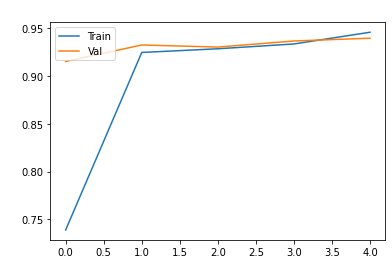

* ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** *


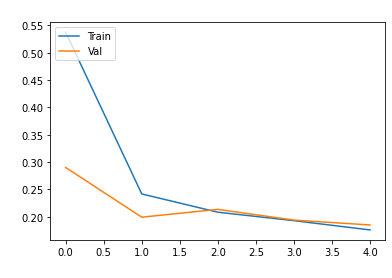

In [25]:
plot_learningcurve(history, 5)

In [0]:
img = plt.imread('/content/para.png')

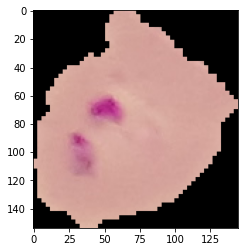

In [27]:
plt.imshow(img)

In [0]:
from PIL import Image

In [35]:
test = tf.cast(test, tf.float32)
test.shape

TensorShape([1, 100, 100, 3])

In [0]:
def to_pred():
  path_test = input("Copy the path of image here")
  IMG = Image.open(path_test)
  X = IMG.resize(size=(100,100))
  I = np.array(X)
  test = I.reshape(1,100,100,3)
  test = tf.cast(test, tf.float32)
  return test


In [117]:
model.predict(to_pred()) # it will ask to give a path of input image for testing

Copy the path of image here/content/para.png


array([[0.]], dtype=float32)

1 means it says class 1 ie Uninfected and if 0 it means parasitized or infected

**********************************************************************************************************************************************

**********************************************************************************************************************************************

Now we use a different method to build a model and predict it 

In [0]:
import cv2
import os 

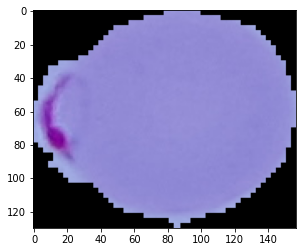

In [73]:
datadir = "/content/MALARIA_DATA"
categories = ["Parasitized", "Uninfected"]

for category in categories:
  path = os.path.join(datadir,category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img))
    plt.imshow(img_array)
    plt.show()
    break
  break

In [74]:
img_array.shape

(130, 157, 3)

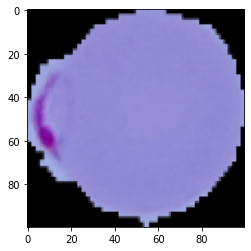

In [75]:
img_size = 100

new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array)
plt.show()

In [0]:
training_Data = []

def training_data():
  for category in categories:
    path = os.path.join(datadir,category)
    class_num = categories.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path,img))
        new_array = cv2.resize(img_array,(img_size,img_size))
        training_Data.append([new_array,class_num])
      except Exception as e:
        pass 
            
training_data()

In [77]:
len(training_Data)

27558

In [0]:
import random 
random.shuffle(training_Data)   # we shuffle the data .. so network will take efforts to learn

In [0]:
for sample in training_Data:
    print(sample[1])

In [0]:
X = []
y = []

In [0]:
for features , label in training_Data:
  X.append(features)
  y.append(label)

X = np.array(X).reshape(-1, img_size,img_size,3)

In [82]:
X[0].shape

(100, 100, 3)

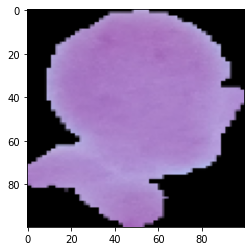

In [83]:
plt.imshow(X[20000])
plt.show()

In [84]:
y = np.array(y)
y

array([0, 1, 0, ..., 1, 0, 1])

In [85]:
y.shape

(27558,)

Now we split the data into training and testing

In [86]:
X_Train = X[0:19290]  # we take 70% of the data for traing
X_Train.shape

(19290, 100, 100, 3)

In [87]:
X_test = X[19290:]  # remaining 30% of the data for testing
X_test.shape 

(8268, 100, 100, 3)

now out of the training data we take some data for validation too

In [0]:
X_train = X_Train[0:14467]

In [0]:
X_val = X_Train[14467:]

In [90]:
X_val.shape

(4823, 100, 100, 3)

# similarly everything with y

In [91]:
Y_Train = y[0:19290]
Y_Train.shape

(19290,)

In [92]:
y_test = y[19290:]
y_test.shape

(8268,)

In [0]:
y_train = Y_Train[0:14467] #taking out some of the data for val..

In [96]:
y_val = Y_Train[14467:]
y_val.shape

(4823,)

In [0]:
#np.save('y_train.npy',y_train)
#hello = np.load('y_train.npy')    # if you wanna save the file and load it somewhere else

In [0]:
from tensorflow.keras.layers import BatchNormalization

In [0]:
model2 = Sequential()

model2.add(Conv2D(filters=32,kernel_size=(3, 3),input_shape=(img_size,img_size,3),activation='relu')) 
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.2))  # dropping 20% of neurons

model2.add(Conv2D(filters=64,kernel_size=(3, 3),activation='relu')) 
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.3))

model2.add(Conv2D(filters=128,kernel_size=(3, 3),activation='relu')) 
model2.add(BatchNormalization())
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.4))

model2.add(Flatten())
model2.add(Dense(units=64, activation='relu'))  
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

model2.add(Dense(units=1, activation='sigmoid'))

In [110]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
batch_normalization_10 (Batc (None, 98, 98, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 47, 47, 64)        18496     
_________________________________________________________________
batch_normalization_11 (Batc (None, 47, 47, 64)        256       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 23, 23, 64)       

In [0]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [112]:
history_2 = model2.fit(X_train,y_train,batch_size=32,epochs=7,verbose=1,validation_data=(X_val,y_val))

Train on 14467 samples, validate on 4823 samples
Epoch 1/7
14467/14467 [==============================] - 10s 665us/sample - loss: 0.6311 - accuracy: 0.7055 - val_loss: 1.3433 - val_accuracy: 0.5758
Epoch 2/7
14467/14467 [==============================] - 8s 576us/sample - loss: 0.2967 - accuracy: 0.8895 - val_loss: 0.4554 - val_accuracy: 0.8868
Epoch 3/7
14467/14467 [==============================] - 8s 579us/sample - loss: 0.2161 - accuracy: 0.9261 - val_loss: 0.3595 - val_accuracy: 0.8911
Epoch 4/7
14467/14467 [==============================] - 8s 579us/sample - loss: 0.1905 - accuracy: 0.9353 - val_loss: 0.2971 - val_accuracy: 0.9146
Epoch 5/7
14467/14467 [==============================] - 8s 578us/sample - loss: 0.1704 - accuracy: 0.9420 - val_loss: 0.4713 - val_accuracy: 0.8692
Epoch 6/7
14467/14467 [==============================] - 8s 577us/sample - loss: 0.1649 - accuracy: 0.9448 - val_loss: 0.1891 - val_accuracy: 0.9380
Epoch 7/7
14467/14467 [==============================] -

In [0]:
model2.evaluate(X_test,y_test,verbose=1)  # output of this is loss , accuracy value respectively 
# here it loss = 0.2 , accuracy = 0.9351

In [143]:
len(X_test)

8268

In [0]:
def to_pred_test(X_test):
  testing = tf.cast(X_test, tf.float32)
  return testing

In [138]:
y_pred = model2.predict(to_pred_test(X_test))
print(y_pred)

[[0.98583436]
 [0.00198051]
 [0.07984358]
 ...
 [0.99875426]
 [0.2594263 ]
 [0.99864864]]


Plotting the learning curve

In [134]:
history_2.history

{'accuracy': [0.70546764,
  0.8894726,
  0.9261077,
  0.935301,
  0.94200593,
  0.94483995,
  0.9460842],
 'loss': [0.6310566879591055,
  0.29671007487452966,
  0.2161377642826178,
  0.1904845655886564,
  0.17042492042186388,
  0.1648706063654462,
  0.16240182118465232],
 'val_accuracy': [0.5757827,
  0.8867925,
  0.8911466,
  0.914576,
  0.8691686,
  0.9380054,
  0.93634665],
 'val_loss': [1.3433165346935976,
  0.4554358650398235,
  0.3595063009438563,
  0.29710773440093735,
  0.4713378825110814,
  0.18906833389250663,
  0.19436512053439214]}

In [0]:
def plot_learningcurve(history, epochs):
  epochs_range = (1, epochs+1)
  plt.plot(history.history['accuracy'],)
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy',color = 'white')
  plt.ylabel('Accuracy',color = 'white')
  plt.xlabel('Epoch',color = 'white')
  plt.legend(['Train','Val'],loc = 'upper left')
  plt.show()

  print('* *'*50)
  #plot training and validation ( loss values )
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss',color = 'white')
  plt.ylabel('Loss',color = 'white')
  plt.xlabel('Epoch',color = 'white')
  plt.legend(['Train','Val'],loc = 'upper left')
  plt.show()

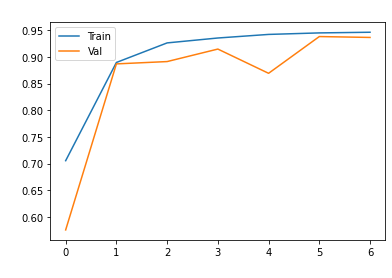

* ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** ** *


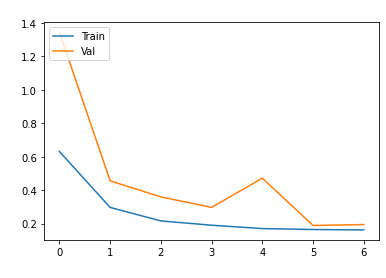

In [136]:
plot_learningcurve(history_2,7)